<a href="https://colab.research.google.com/github/dinithprimal/DeepLearning_Tutorials/blob/main/EX13_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

In [7]:
y_test = y_test.reshape(-1,)
y_test.shape

(10000,)

In [8]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def plot_sample(X, y, index):
  plt.figure(figsize=(1,1))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

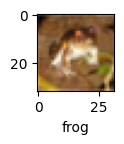

In [11]:
plot_sample(X_train, y_train, 0)

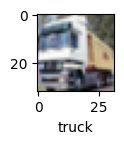

In [12]:
plot_sample(X_train, y_train, 1)

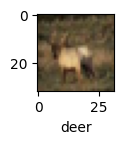

In [13]:
plot_sample(X_train, y_train, 3)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## First Build simle ANN Model

In [15]:
ANN = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [16]:
ANN.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
ANN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 17s 9ms/step - loss: 1.8093 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6220 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5419 - accuracy: 0.4546
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4811 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4324 - accuracy: 0.4955


In [18]:
ANN.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5116 - accuracy: 0.4592


[1.511597990989685, 0.459199994802475]

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.52      0.53      1000
           1       0.68      0.56      0.61      1000
           2       0.24      0.65      0.35      1000
           3       0.42      0.20      0.27      1000
           4       0.53      0.17      0.25      1000
           5       0.49      0.26      0.34      1000
           6       0.43      0.67      0.52      1000
           7       0.56      0.51      0.53      1000
           8       0.61      0.61      0.61      1000
           9       0.66      0.44      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



## Improve the Performance with CNN

In [20]:
CNN = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # ANN
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
CNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
CNN.fit(X_test, y_test, epochs=5)

Epoch 1/5
313/313 [==============================] - 4s 5ms/step - loss: 1.8858 - accuracy: 0.3164
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 1.5040 - accuracy: 0.4563
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 1.3364 - accuracy: 0.5247
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 1.2111 - accuracy: 0.5677
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.1081 - accuracy: 0.6074


In [23]:
CNN.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9825 - accuracy: 0.6625


[0.9824682474136353, 0.6625000238418579]

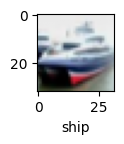

In [25]:
plot_sample(X_test, y_test, 1)

In [26]:
y_pred = CNN.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[3.3904329e-02, 2.3829334e-03, 1.8657149e-01, 4.2912155e-01,
        8.2936389e-03, 1.4501567e-01, 6.7749530e-02, 3.7348135e-03,
        1.1903014e-01, 4.1959449e-03],
       [1.5781313e-01, 1.6816062e-01, 3.5944584e-04, 3.3436972e-05,
        2.2820395e-05, 2.2579247e-06, 3.1958969e-06, 2.3973398e-06,
        6.2710184e-01, 4.6500888e-02],
       [2.5032264e-01, 7.3715717e-02, 5.1387757e-02, 7.7223848e-03,
        6.2052994e-03, 1.9820405e-03, 4.0661794e-04, 4.7967853e-03,
        5.3682142e-01, 6.6639349e-02],
       [3.4569874e-01, 6.2385583e-03, 9.4160298e-03, 1.4587602e-04,
        3.1161465e-04, 2.7128637e-05, 3.7490470e-05, 5.3639866e-05,
        6.3515973e-01, 2.9111847e-03],
       [3.2693374e-03, 3.7420919e-04, 1.8725809e-01, 4.7874495e-02,
        4.0749523e-01, 3.4069635e-02, 3.1203055e-01, 6.4137015e-03,
        7.3351199e-04, 4.8122651e-04]], dtype=float32)

In [27]:
np.argmax(y_pred[0])

3

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[0]

3

In [29]:
y_classes[:5]

[3, 8, 8, 8, 4]

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

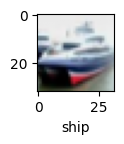

In [31]:
plot_sample(X_test, y_test, 1)

In [32]:
classes[y_classes[1]]

'ship'

In [33]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.79      0.68      1000
           1       0.82      0.73      0.77      1000
           2       0.45      0.63      0.52      1000
           3       0.59      0.43      0.50      1000
           4       0.62      0.53      0.57      1000
           5       0.64      0.57      0.61      1000
           6       0.76      0.75      0.75      1000
           7       0.76      0.73      0.74      1000
           8       0.74      0.77      0.76      1000
           9       0.77      0.68      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

